# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('previsao_renda.csv')
data = data.drop('Unnamed: 0', axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   index                  15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12466 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  mau                    15000 non-null  bool   
 14  renda                  15000 non-null  float64
dtypes:

In [4]:
data['data_ref'] = pd.to_datetime(data['data_ref'])

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

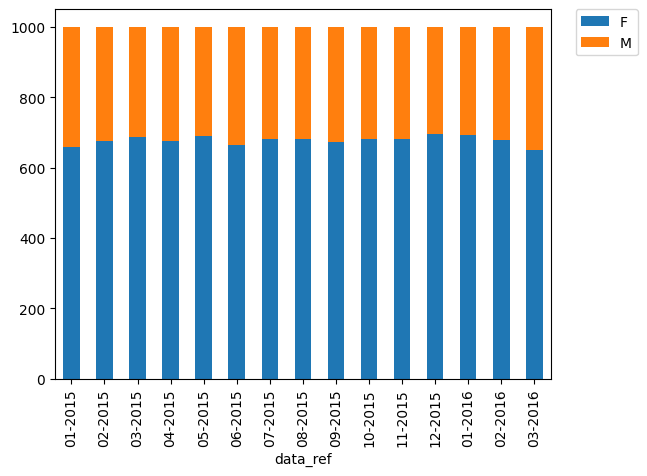

In [39]:
tab = pd.crosstab(data['data_ref'], data['sexo'])
tab.div(tab.sum(axis=1), axis=0)


ax = tab.plot.bar(stacked=True)
tick_labs = data['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()

ticks = ax.set_xticks(list(range(data['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

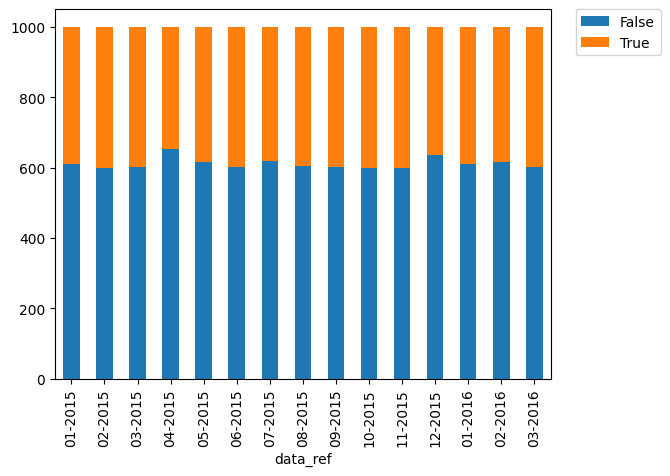

In [40]:
tab = pd.crosstab(data['data_ref'], data['posse_de_veiculo'])
tab.div(tab.sum(axis=1), axis=0)


ax = tab.plot.bar(stacked=True)
tick_labs = data['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()

ticks = ax.set_xticks(list(range(data['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

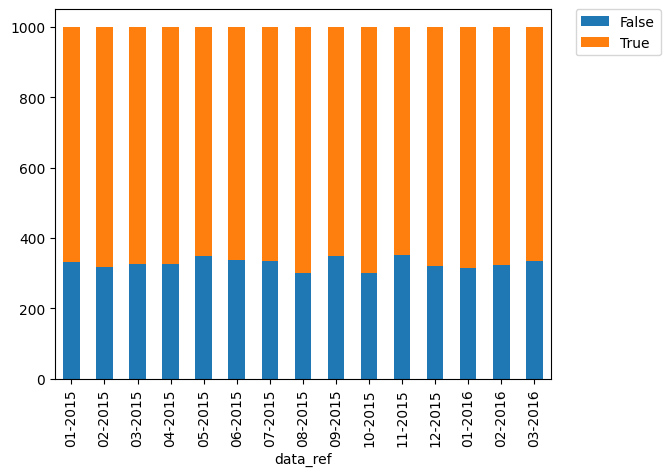

In [42]:
tab = pd.crosstab(data['data_ref'], data['posse_de_imovel'])
tab.div(tab.sum(axis=1), axis=0)


ax = tab.plot.bar(stacked=True)
tick_labs = data['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()

ticks = ax.set_xticks(list(range(data['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [33]:
## Você acha que houve alguma alteração importante a ser investigada?
# Acredito que não houve nenhuma alteração muito significativa, os dados mantiveram sempre um padrão.
# Única variação maior notada foi na variável 'educacao', que a partir do mes 09/2015 aumentou repentinamente a quantidade de pessoas com ensino superior.

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

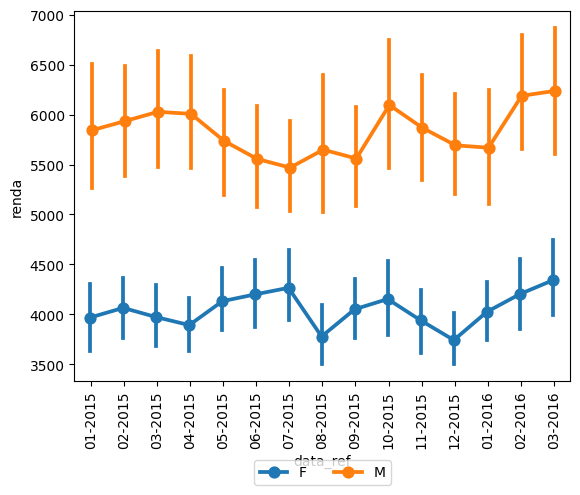

In [15]:
ax = sns.pointplot(x='data_ref', y='renda', hue='sexo',
                   data=data,dodge=True, errorbar=('ci',95))

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=3)

tick_labs = data['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()

ticks = ax.set_xticks(list(range(data['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

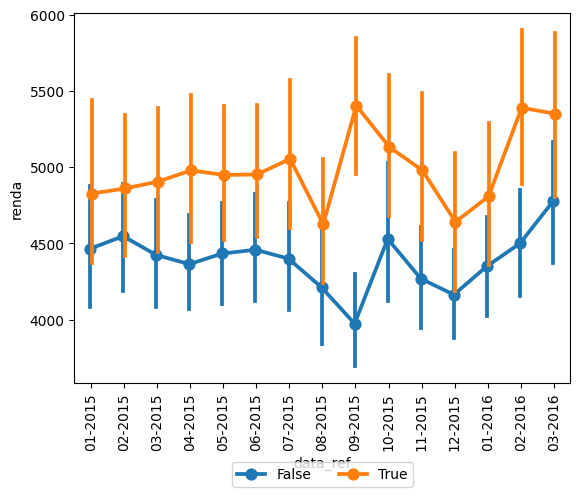

In [16]:
ax = sns.pointplot(x='data_ref', y='renda', hue='posse_de_veiculo',
                   data=data,dodge=True, errorbar=('ci',95))

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=3)

tick_labs = data['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()

ticks = ax.set_xticks(list(range(data['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

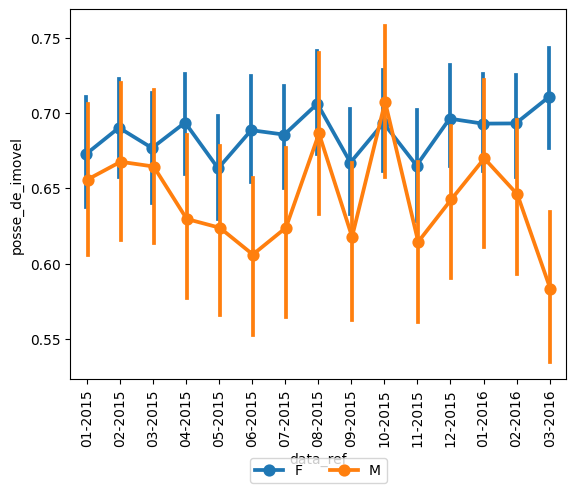

In [17]:
ax = sns.pointplot(x='data_ref', y='posse_de_imovel', hue='sexo',
                   data=data,dodge=True, errorbar=('ci',95))

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.30), ncol=3)

tick_labs = data['data_ref'].map(lambda ts: ts.strftime('%m-%Y')).unique()

ticks = ax.set_xticks(list(range(data['data_ref'].nunique())))
labels = ax.set_xticklabels(tick_labs, rotation=90)

In [43]:
## Acho que os dados podem sim ser usados numa modelagem, principalmente levar em consideracao o sexo e a posse_de_veiculo
## A posse de imóvel tem bastante cruzamento entre si dos dados durante o tempo.